# Cinematic Movies Analysis, exploring the factors that lead to a blockbuster production 

The golden era of cinema may have ended in the 1960s with the 5 major studios no longer being able to block book theaters by law after the paramount case, however it gave birth to the Hollywood Renaissance which took place in the 1960s to the 1980s. This was when an influx of new, young and talented filmmakers with fresh ideas came to prominence in the United States. These directors have had a profound impact on what the modern era of cinema looks like today around the world, having given us some of the most iconic, inspiring and best selling movies of all time.

Up and coming directors, students of film and cinephiles may have all once wondered; what are the ingredients behind producing a high selling movie? Using a data-driven approach, I will do my best to answer that question.  

### The Approach

The purpose of this project is to explore the factors that lead to a successful high selling production with a focus on movies from the modern era of cinema (1980 onwards). I will be performing causal analysis to look at the correlation between different variables and the gross income of a movie which will be the measure of success for this analysis.

For this analysis, I will be using the [movie industry dataset](https://www.kaggle.com/danielgrijalvas/movies) which can be found on Kaggle. This dataset contains 4 decades worth of movie data which will be essential to carry out this study. 

Here is a summary of my approach:
- Getting the data from a csv file
- Cleaning and preparing the data for analysis
- Finding correlations in the data
- Drawing a conclusion based on the results

Now, let's start retrieving the data.

## Getting the Data 

In [1]:
# standard imports 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# configuring plot  
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# read in the data
df = pd.read_csv("movies-data\movies.csv")

In [2]:
# first 5 rows of the data frame
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#last 5 rows of the data frame
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Here is the data we will be working with. We have 7667 movies in this dataset and each movie has the following attributes:
- name: name of the movie
- rating: rating of the movie (R, PG, etc.)
- genre: main genre of the movie.
- year: year of release
- released: release date 
- score: IMDb user rating
- votes: number of user votes
- director: the director
- writer: writer of the movie
- star: main actor/actress
- country: country of origin
- budget: the budget of a movie. Some movies don't have this, so it appears as 0
- gross: revenue of the movie
- company: the production company
- runtime: duration of the movie

### Cleaning and preparing the data for analysis

In [5]:
# checking for missing data
for col in df.columns:
    pct_of_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col,pct_of_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [7]:
# checking for missing data
for col in df.columns:
    pct_of_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col,pct_of_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


The first thing I wanted to check was if there was missing data in the dataset. As shown we can see that there are NA values in the columns: rating, released, score, votes, writer, star, country, budget, gross, company and runtime. Incomplete entries in the data will produce inaccurate results therefore we will need to omit those movies. 

As shown, we can now see that the number of movies in the data have reduced from 7667 to 5421 movies and we have completed filtered out the incomplete entries.

In [8]:
# split column released into released date and country of release
country_of_release = list()
release_date = list()

for entry in df['released'].astype(str):
    released = entry.strip(")").split("(",1)
    country_of_release.append(released[1])
    release_date.append(released[0])

df['release date'] = release_date
df['country of release'] = country_of_release

df = df.drop(columns='released')

In [9]:
# data
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release date,country of release
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


Looking at the 'released' column, I saw that it contained two seperate pieces of information which were the release date in full format and the country of release which the release date corresponds to. For the sake of data integrity, I decided to split that column into two columns called release date and country of release. 

In [10]:
# variable data types
df.dtypes

name                   object
rating                 object
genre                  object
year                    int64
score                 float64
votes                 float64
director               object
writer                 object
star                   object
country                object
budget                float64
gross                 float64
company                object
runtime               float64
release date           object
country of release     object
dtype: object

In [11]:
# changing data type  
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.dtypes

name                   object
rating                 object
genre                  object
year                    int64
score                 float64
votes                   int64
director               object
writer                 object
star                   object
country                object
budget                  int64
gross                   int64
company                object
runtime               float64
release date           object
country of release     object
dtype: object

After looking at the data types of the variables, I was not satisfied that the data type of a few variables matched the nature of the vairable perfectly. I changed the data type to integer as I feel that not only does it match the variable better but it is also easier on the eye. 

In [12]:
# sorting data frame by gross income
df = df.sort_values(by=['gross'],ascending=False)
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release date,country of release
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009",United States
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019",United States
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997",United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015",United States
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,"January 15, 2015",Sweden
2434,Philadelphia Experiment II,PG-13,Action,1993,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,"June 4, 1994",South Korea
3681,Ginger Snaps,Not Rated,Drama,2000,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,"May 11, 2001",Canada
272,Parasite,R,Horror,1982,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,"March 12, 1982",United States


In [13]:
# dropping for duplicate data

df = df.drop_duplicates()

Finally, I have dropped all duplicate columns and made sure that the rows were sorted by gross earnings in descending order so that it is easier to see the list of top selling movies.

## Analysis

I will start by looking at a correlation matrix of the dataset and try to see if there are any interesting insights that can be taken away from in the numerical data. I will be using Pearson parametric correlation test.

### Correlation matrix for numerical variables

In [14]:
correlation_matrix = df.corr(method="pearson")
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


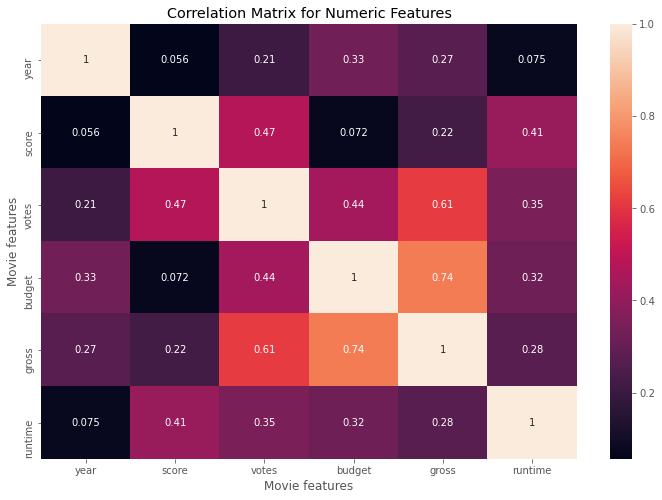

In [15]:
correlation_matrix = df.corr(method="pearson")
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

Amongst the numeric features, we can see with this heatmap that there are two particular variables that have a strong positive correlation with gross earnings, budget and votes. They are the only two variables with a correlation greater than 0.5 with the variable, gross. The next variable with the strongest correlation has an r value of 0.26 so we can say that the correlation with the other variables, excluding budget and gross, is weak.

### Budget vs. Gross Earnings Plot

[Text(0.5, 1.0, 'Budget vs. Gross Earnings'),
 Text(0.5, 0, 'Budget (in millions)'),
 Text(0, 0.5, 'Gross income (in 100 millions)')]

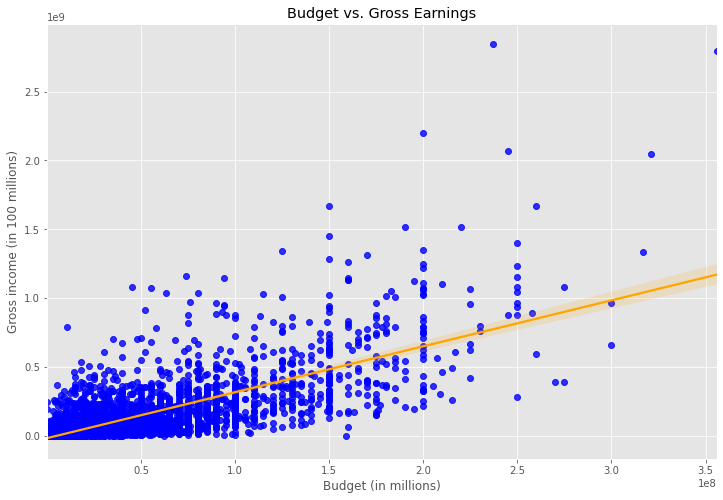

In [16]:
# Budget vs. Gross scatter plot
sns.regplot(x="budget",y="gross",data=df,scatter_kws={"color":"blue"},line_kws={"color":"orange"}).set(
    title="Budget vs. Gross Earnings", xlabel="Budget (in millions)",ylabel="Gross income (in 100 millions)")


Looking at numerical data is not enough. What if the prestige of a company has a role to play in the success of a movie? Is it possible that the writer of the novel has a role to play in the success of the production? We will need to convert all the non-numerical data into numerical data and find out for sure.

### Correlation matrix for all variables

In [17]:
# preparing dataframe
df_numerised = df

for col in df_numerised.columns:
    if(df_numerised[col].dtype == "object"):
        df_numerised[col] = df_numerised[col].astype("category")
        df_numerised[col] = df_numerised[col].cat.codes
        
df_numerised

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release date,country of release
5445,386,5,0,2009,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,496,47
7445,388,5,0,2019,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,124,47
3045,4909,5,6,1997,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,502,47
6663,3643,5,0,2015,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,498,47
7244,389,5,0,2018,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,132,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,5.8,3500,585,2924,1498,47,3000000,5073,1385,96.0,847,41
2434,2969,5,0,1993,4.5,1900,1805,3102,186,47,5000000,2970,1376,97.0,1386,39
3681,1595,3,6,2000,6.8,43000,952,1683,527,6,5000000,2554,466,108.0,1628,8
272,2909,6,9,1982,3.9,2300,261,55,1473,47,800000,2270,582,85.0,1442,47


As you can see we have converted the entire dataframe into numerical data. It is now ready for correlation analysis. Let's have a look at the results.

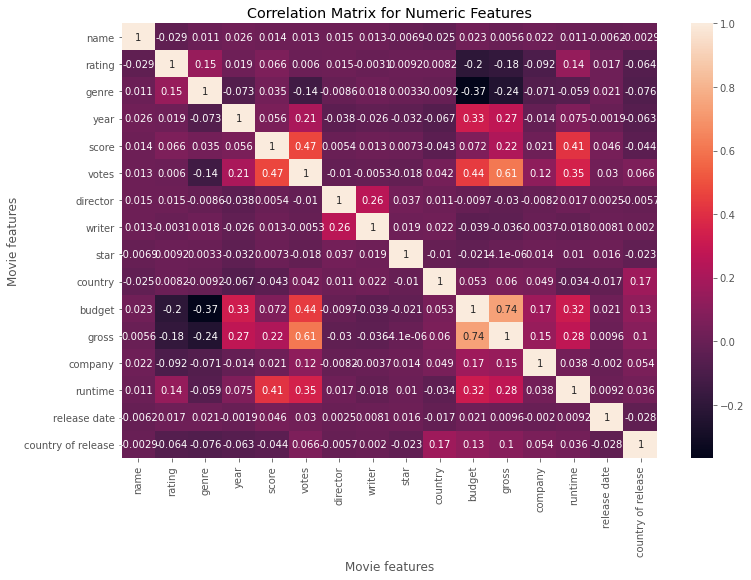

In [18]:
# correlation matrix
correlation_matrix = df_numerised.corr(method="pearson")
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [19]:
# pairs of variables with a strong postive correlation
correlation_matrix = df_numerised.corr()

corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs > 0.5)] 
high_corr

gross               votes                 0.614751
votes               gross                 0.614751
budget              gross                 0.740247
gross               budget                0.740247
name                name                  1.000000
runtime             runtime               1.000000
company             company               1.000000
gross               gross                 1.000000
budget              budget                1.000000
country             country               1.000000
star                star                  1.000000
writer              writer                1.000000
director            director              1.000000
votes               votes                 1.000000
score               score                 1.000000
year                year                  1.000000
genre               genre                 1.000000
rating              rating                1.000000
release date        release date          1.000000
country of release  country of 

After looking at the correlation matrix for all the variables, we can see that the only two variables that have a strong positive correlation with gross earnings remain budget and votes. All of the categorical variables in fact have shown no real correlation and has not changed the initial results.

## Conclusion

So, to answer the question: what are the ingredients behind producing a high selling movie? Well if I was going to answer it in one word it would be budget. The results have shown that the greater the budget, the greater the gross income of the film is. We can also justify this correlation as well. The budget often covers costs of acquiring the script, payments to talent, and production costs. The online popularity of the movie also has a high correlation to the gross earnings of a movie. Increasing online presence on cinematography platforms such as IMBD plays a role in the success of the movie you produce.  

Contrary to the question, we can also say that the production company name has no value to the success of the movie. In the past, this would have been different but in this new modern age the young student of film does not need to work for an elite production company to produce a blockbuster fortunately. Unfortunately, they would need a lot of money. 